In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from saxpy.znorm import znorm
from saxpy.sax import sax_via_window

In [3]:
filename = '/Users/palhares/Documents/msc/PTT-PPG-PhysioNet/physionet.org/files/pulse-transit-time-ppg/1.1.0/csv/s2_sit.csv'
column_name = 'pleth_1'

In [4]:
data = pd.read_csv(filename)
time_series = data[column_name].values

In [5]:
time_series = time_series[:1000]

In [6]:
scaler = StandardScaler()
time_series_scaled = scaler.fit_transform(time_series.reshape(-1, 1))

In [7]:
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 1))
bow = vectorizer.fit_transform([str(row) for row in time_series_scaled])

In [8]:
kmeans = KMeans(n_clusters=3, n_init=10) 
cluster_labels = kmeans.fit_predict(bow)

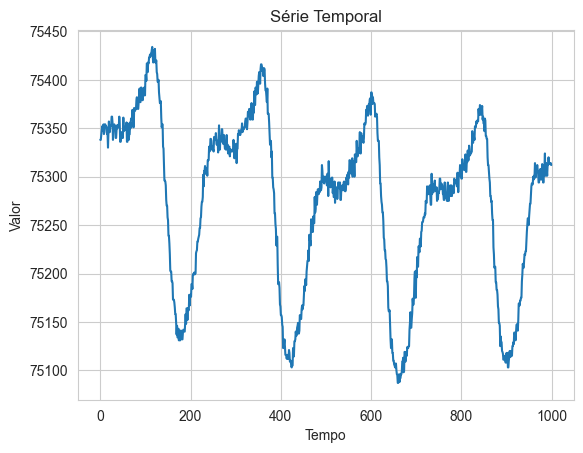

In [9]:
plt.plot(time_series)
plt.title('Série Temporal')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.grid(True)

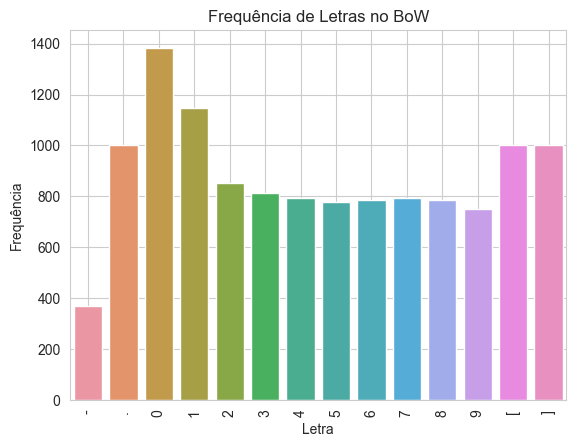

In [10]:
letter_frequencies = bow.sum(axis=0)
letter_frequencies = np.array(letter_frequencies).reshape(-1)
letters = vectorizer.get_feature_names_out()
sns.barplot(x=letters, y=letter_frequencies)
plt.title('Frequência de Letras no BoW')
plt.xlabel('Letra')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.grid(True)

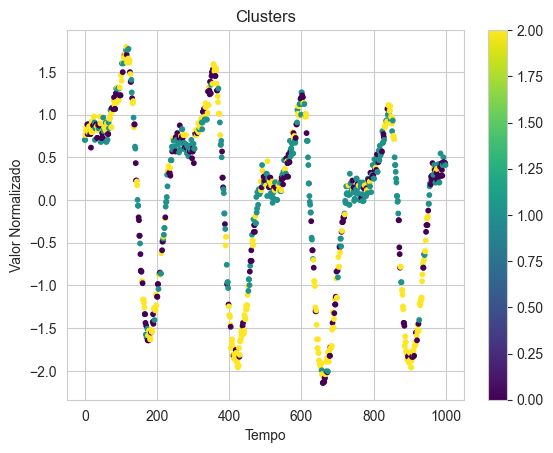

In [11]:
plt.scatter(range(len(time_series)), time_series_scaled, c=cluster_labels, cmap='viridis', s=10)
plt.title('Clusters')
plt.xlabel('Tempo')
plt.ylabel('Valor Normalizado')
plt.colorbar()
plt.grid(True)

In [12]:
n_segments = 20
n_symbols = 5

In [13]:
time_series_normalized = znorm(time_series_scaled.flatten())

In [14]:
sax_representation = sax_via_window(time_series_normalized, n_segments, n_symbols)

In [15]:
symbol_counts = pd.Series(sax_representation).value_counts()
sns.barplot(x=symbol_counts.index, y=symbol_counts.values)
plt.title('Frequência de Símbolos SAX')
plt.xlabel('Símbolo')
plt.ylabel('Frequência')
plt.grid(True)

TypeError: unhashable type: 'list'